# CL Streamer Distribution Test

In [1]:
import pandas as pd
import numpy as np
import itertools
from tqdm.notebook import tqdm
import pickle

import torch
import torch.utils.data as data
from torch.utils.data import DataLoader
import torch.utils.data.sampler as sampler
import torch.nn as nn
import torch.nn.functional as F

from matplotlib import pyplot as plt
from collections import defaultdict
import warnings
from sklearn.preprocessing import LabelEncoder
import random
import line_profiler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
CONTEXT_REPS = pd.read_pickle('../../data/CONTEXT_REPS_CLEAN.pkl')

In [3]:
cols = [f'u{i}' for i in range(110)] + [f's{i}' for i in range(72)] + [f'streamer_{i}' for i in range(9)]

In [4]:
CONTEXT_REPS = CONTEXT_REPS[cols]

In [5]:
streamer_context = {}
for i in range(9):
  streamer_context[i] = CONTEXT_REPS.loc[CONTEXT_REPS[f'streamer_{i}'] == 1].sample(n=100).index

In [6]:
user_cols = [f'u{i}' for i in range(110)]

In [7]:
%%time
pca = PCA(n_components=3)
# pca.fit(FINAL_USER_REPS)
pca_result = pca.fit_transform(CONTEXT_REPS[user_cols])

CPU times: user 13.8 s, sys: 6.05 s, total: 19.9 s
Wall time: 4.42 s


In [8]:
pca_result_df = pd.DataFrame(pca_result, index=CONTEXT_REPS.index)

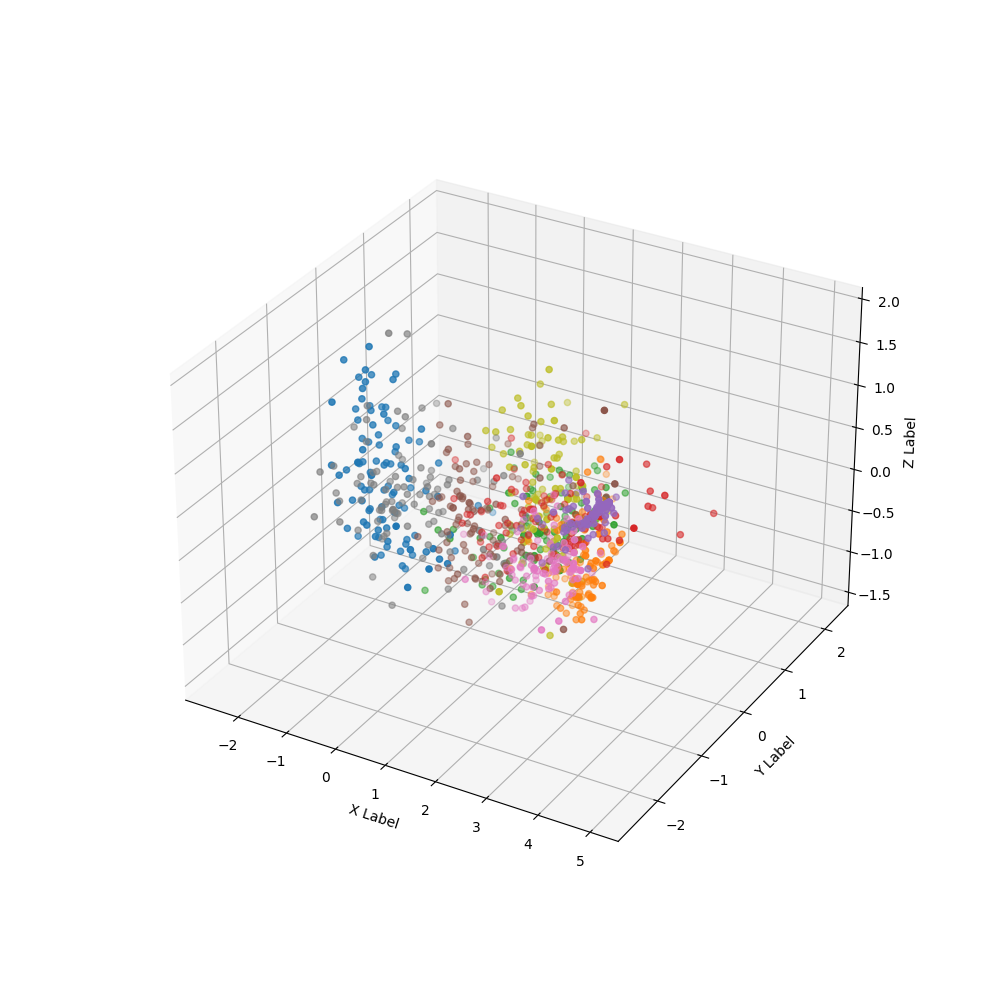

In [9]:
%matplotlib widget

# pca_result_df.loc[streamer_context[0]].plot.scatter
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i in range(9):
  xs = pca_result_df.loc[streamer_context[i]][0]
  ys = pca_result_df.loc[streamer_context[i]][1]
  zs = pca_result_df.loc[streamer_context[i]][2]
  ax.scatter(xs, ys, zs)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

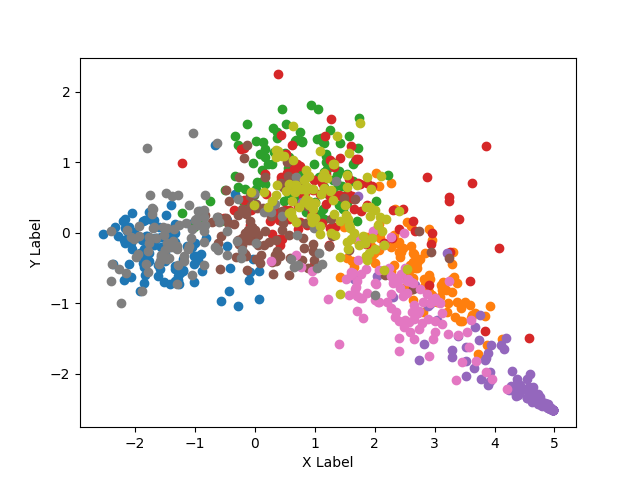

In [10]:
# %matplotlib widget

# pca_result_df.loc[streamer_context[0]].plot.scatter
fig = plt.figure()
ax = fig.add_subplot()

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i in range(9):
  xs = pca_result_df.loc[streamer_context[i]][0]
  ys = pca_result_df.loc[streamer_context[i]][1]
  # zs = pca_result_df.loc[streamer_context[i]][2]
  ax.scatter(xs, ys)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

plt.show()

### Only use user context

In [11]:
user_df = pd.read_pickle('../../data/final_user_reps.pkl')

In [12]:
cols = [i for i in range(72)] + [f'streamer_{i}' for i in range(9)]

In [13]:
user_df = user_df[cols]

In [14]:
user_df[[f'streamer_{i}' for i in range(9)]].sum()

streamer_0     988241.0
streamer_1     125437.0
streamer_2      74718.0
streamer_3       2636.0
streamer_4      28013.0
streamer_5     153098.0
streamer_6     107465.0
streamer_7    2483259.0
streamer_8    1334565.0
dtype: float64

In [15]:
user_df_sum = user_df.reset_index().groupby('asid').mean()

In [16]:
streamer_context_u = {}
for i in range(9):
  # print(i, user_df_sum.loc[user_df_sum[f'streamer_{i}'] > 1].count())
  streamer_context_u[i] = user_df_sum.loc[user_df_sum[f'streamer_{i}'] > 1].sample(n=80).index

In [17]:
%%time
pca_u = PCA(n_components=3)
# pca.fit(FINAL_USER_REPS)
pca_result_u = pca_u.fit_transform(user_df_sum[range(72)])
pca_result_u_df = pd.DataFrame(pca_result_u, index=user_df_sum.index)

CPU times: user 1.15 s, sys: 905 ms, total: 2.05 s
Wall time: 322 ms


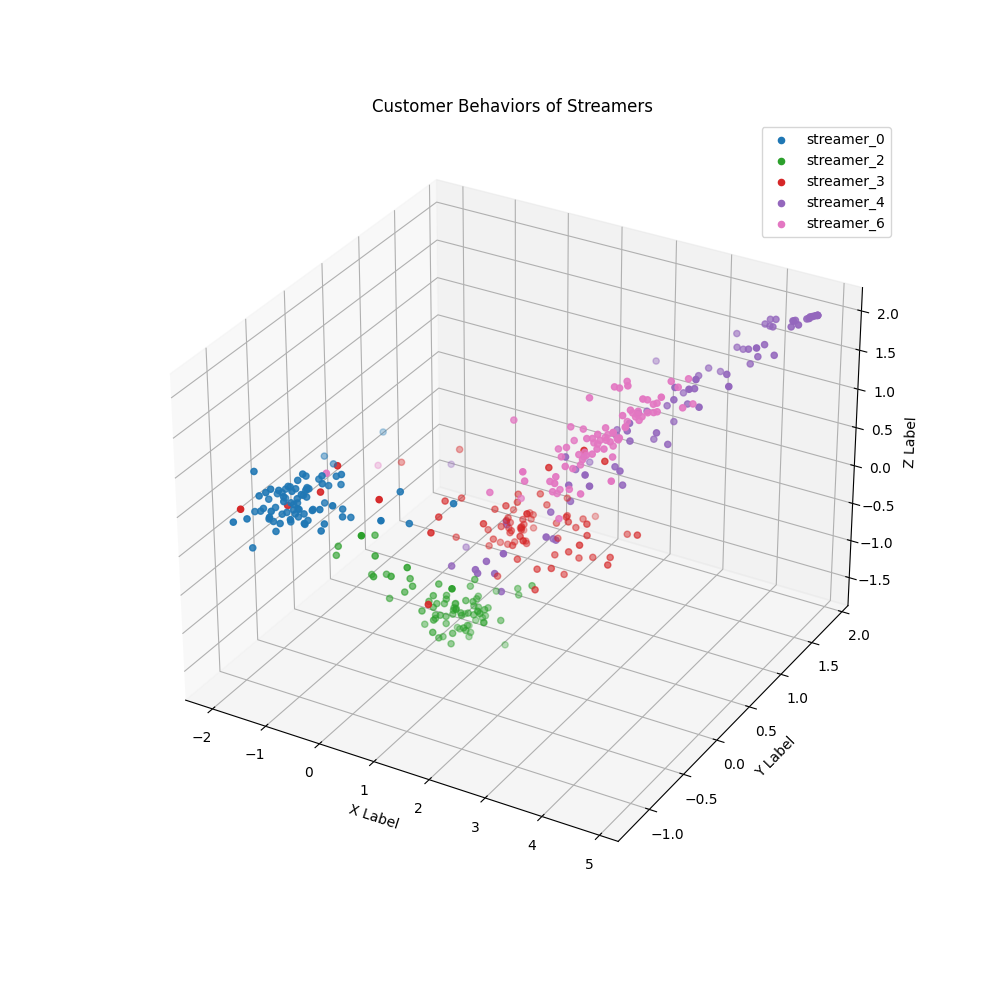

In [25]:
# %matplotlib widget

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# for i, c in zip([1, 5, 7, 8], ['tab:orange', 'tab:brown', 'tab:gray', 'tab:olive']):
for i, c in zip([0, 2, 3, 4, 6], ['tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink']):
# for i, c in zip([0, 1, 2, 3, 4, 5, 6, 7, 8], ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']):
  xs = pca_result_u_df.loc[streamer_context_u[i]][0]
  ys = pca_result_u_df.loc[streamer_context_u[i]][1]
  zs = pca_result_u_df.loc[streamer_context_u[i]][2]
  ax.scatter(xs, ys, zs, label=f'streamer_{i}', color=c)

ax.legend()
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.title('Customer Behaviors of Streamers')
plt.show()

In [19]:
pca_result_u_df

,0,1,2
asid,,,
1000057940522534,-1.125952,-0.738762,0.502207
1000149184139055,0.874799,-0.270680,-0.791055
1000250653732283,-2.090534,0.755957,-0.148173
1000394583731592,-1.978120,0.633160,0.099128
1000409986993290,1.229262,-0.236375,-0.305928
...,...,...,...
Ufe1ba7a6085a9f2b26be56a9dda7c3d3,1.929958,0.345133,0.289814
Ufe42238547aafe54164d27d60c8d80b8,0.807226,-0.585210,-0.815672
Ufe8d37b0b63a229fb76eddea3e430d8c,-1.173683,0.557675,-0.251996
